In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
## Fonction gloutonne
def arrangement_glouton(V, E, C):
    V_sort = V
    E_sort = E
    C_temp = C
    
    ## Sort V tab and E tab
    for i in range(len(V_sort)):
        if(i+1 == len(V_sort)):
            break
            
        for j in range(i+1,len(V_sort)):
            if(V_sort[j] > V_sort[i]):
                temp = V_sort[i]
                V_sort[i] = V_sort[j]
                V_sort[j] = temp
                
                temp = E_sort[i]
                E_sort[i] = E_sort[j]
                E_sort[j] = temp
    
    ## Get glouton tab in getting the biggest values of V tab
    glouton_tab = []
    for i in range(len(V_sort)):
        if(C_temp - E_sort[i] >= 0):
            glouton_tab.append(V_sort[i])
            C_temp -= E_sort[i]
    
    return glouton_tab

In [3]:
def arrangement_optimal(V,E,C): #CalculerM() function
    n = len(V)
    M = [ [c for c in range(0,C+1)] for k in range(0,n+1)]
    for c in range(C+1) : M[0][c] = 0 # base de la récurrence
    # cas général
    for k in range(1,n+1) :
        for c in range(C+1) :
            if E[k-1] <= c : M[k][c] = max(V[k-1] + M[k-1][c-E[k-1]], M[k-1][c])
            else : # le k-ème objet est trop encombrant pour le sac de contenance c
                M[k][c] = M[k-1][c]
    return M

def afficherSac(M,V,E,k,c, i = 0) : 
    if k==0 : 
        return
    if M[k][c] == M[k-1][c] : # le k-ème objet n'est pas dans le sac
        afficherSac(M,V,E,k-1,c, i) # l'affichage du sac "k,c" est obtenu en affichant le sac "k-1,c"
    else : 
        afficherSac(M,V,E,k-1,c-E[k-1],1 ) # afficher le sac "k-1,c-e(k-1)"
        if(i == 0):
            print(str(V[k-1]), end="")
        else:
            print(str(V[k-1]) + ", ", end="")

def calculValSac(M,V,E,k,c) : 
    if k==0 : 
        return 0
    if M[k][c] == M[k-1][c] : # le k-ème objet n'est pas dans le sac
        maxi = calculValSac(M,V,E,k-1,c) # l'affichage du sac "k,c" est obtenu en affichant le sac "k-1,c"
        return maxi
    else : 
        maxi = calculValSac(M,V,E,k-1,c-E[k-1]) # afficher le sac "k-1,c-e(k-1)"
        return maxi + V[k-1]

In [4]:
## Cas de M.Natowicz
print("Cas de M.Natowicz")
V =  [6, 3, 9, 14, 12, 11, 3, 4, 9, 20]
E =  [2, 2, 6, 5, 4, 9, 6, 1, 1, 9]
C =  10
print(30*"- ")
print("C : " + str(C))
print("V : " + str(V))
print("E : " + str(E))
print(30*"- ")
## Approche gloutonne
glouton_tab = arrangement_glouton(V,E,C)
print("Tab glouton : " + str(glouton_tab))
sum_glouton = 0
for elem in glouton_tab:
    sum_glouton += elem
print("Valeur max gloutonne : " + str(sum_glouton))

##Approche optimale
optimal_tab = arrangement_optimal(V,E,C)
print("Tab optimal : [",end="") 
afficherSac(optimal_tab,V,E,len(V),C, i = 0)
print("]")
valMax = calculValSac(optimal_tab,V,E,len(V),C)
print("Valeur max optimale : " + str(valMax))

Cas de M.Natowicz
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
C : 10
V : [6, 3, 9, 14, 12, 11, 3, 4, 9, 20]
E : [2, 2, 6, 5, 4, 9, 6, 1, 1, 9]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Tab glouton : [20, 9]
Valeur max gloutonne : 29
Tab optimal : [14, 12, 9]
Valeur max optimale : 35


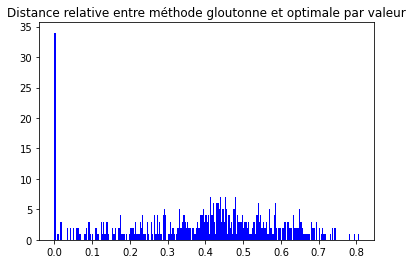

In [5]:
nb_tests = 500
list_val_opti = []
list_val_gloutonne = []
list_dist_relativ = []
for i in range(nb_tests):
    V = []
    E = []
    C = random.randint(10,2000)
    N = random.randint(1, 200)
    for i in range(N):
        V.append(random.randint(1, 500))
        E.append( random.randint(1, int(C/2) ) ) 

    ## Approche gloutonne
    glouton_tab = arrangement_glouton(V,E,C)
    sum_glouton = 0
    for elem in glouton_tab:
        sum_glouton += elem

    ##Approche optimale
    optimal_tab = arrangement_optimal(V,E,C)
    valMax = calculValSac(optimal_tab,V,E,len(V),C)
    
    list_val_gloutonne.append(sum_glouton)
    list_val_opti.append(valMax)
    list_dist_relativ.append((valMax - sum_glouton)/valMax)

num_bins = len(list_dist_relativ)//2
plt.hist(list_dist_relativ, num_bins, facecolor = 'blue', alpha = 1)
plt.title("Distance relative entre méthode gloutonne et optimale par valeur")
plt.show()